In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from bokeh.charts import TimeSeries, output_file, show
plt.rcParams['axes.unicode_minus']=False #正常顯示負號
plt.rcParams['font.family']='SimHei'   # 顯示中文 且為黑體

%matplotlib inline
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('Prices.csv', parse_dates=True)

df = df[['Name', 'US dollar', 'G5 currency index', 'Producer index', 'Consumer index']]  ## 只留下要的欄位
df_day= pd.DataFrame(columns = ['30_day', '60_day', '120_day', '240_day'])  ## 新增日均線欄位
df = pd.concat([df,df_day], axis = 1)  ## 新舊dataframe合併

df.columns = df.columns.str.replace(' ','_')   # 把欄位名稱的 空格 改成 "_"
df=df.rename(columns = {'Name':'Date'})   ## 把 Name欄位名稱 改成 Date

df['US_dollar'] = df['US_dollar'].str.replace(',','')  ##US_dollar裡面有值有","  先換掉才能轉float 
#df['US_dollar'] = df['US_dollar'].astype('float')   ## US_dollar轉 float
df[['US_dollar', '30_day', '60_day', '120_day', '240_day']] = df[['US_dollar', '30_day', '60_day', '120_day', '240_day']].astype('float')   ## US_dollar轉 float
df['Date'] = pd.to_datetime(df.Date, errors = 'raise')    ## date 轉 datetime
df = df.set_index(df['Date'], drop = True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10131 entries, 1978-12-29 to 2017-10-27
Data columns (total 9 columns):
Date                 10131 non-null datetime64[ns]
US_dollar            10131 non-null float64
G5_currency_index    10129 non-null float64
Producer_index       6470 non-null float64
Consumer_index       8560 non-null float64
30_day               0 non-null float64
60_day               0 non-null float64
120_day              0 non-null float64
240_day              0 non-null float64
dtypes: datetime64[ns](1), float64(8)
memory usage: 791.5 KB


,Date,US_dollar,G5_currency_index,Producer_index,Consumer_index,30_day,60_day,120_day,240_day
Date,,,,,,,,,
1978-12-29,1978-12-29,226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-01-01,1979-01-01,226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-01-02,1979-01-02,226.8,132.5,NaN,NaN,NaN,NaN,NaN,NaN
1979-01-03,1979-01-03,218.6,134.2,NaN,NaN,NaN,NaN,NaN,NaN
1979-01-04,1979-01-04,223.2,134.0,NaN,NaN,NaN,NaN,NaN,NaN


## 日均線 新增值

In [3]:
## 用迴圈 新增一個list 內容為前30天平均 - 比較麻煩der方法
'''
i = 30
list1 = []
for i in range(len(df['US_dollar'])):
    if i < len(df['US_dollar']+1):
        s = df.iloc[i-30:i, 1].mean()
        list1.append(s)
del list1[0]  ## 刪掉第一個觀察值  位置才會對
df1 = pd.DataFrame({'30_day':list1}, dtype = 'float') ## list 轉 DataFrame
df = pd.concat([df, df1], axis = 1)  #合併到欄
df[28:32]
'''

"\ni = 30\nlist1 = []\nfor i in range(len(df['US_dollar'])):\n    if i < len(df['US_dollar']+1):\n        s = df.iloc[i-30:i, 1].mean()\n        list1.append(s)\ndel list1[0]  ## 刪掉第一個觀察值  位置才會對\ndf1 = pd.DataFrame({'30_day':list1}, dtype = 'float') ## list 轉 DataFrame\ndf = pd.concat([df, df1], axis = 1)  #合併到欄\ndf[28:32]\n"

In [4]:
## 測試用
#df.iloc[0:1 ,5] = df.iloc[0:30,1].mean()
#df.iloc[0:1 ,5]

In [5]:
t = 30; s = 60; tlf = 120; ttf = 240
for num in range(len(df['US_dollar'])+1):
    df.iloc[t-1:t, 5] = df.iloc[t-30:t, 1].mean()
    t += 1
    df.iloc[s-1:s, 6] = df.iloc[s-60:s, 1].mean()
    s += 1
    df.iloc[tlf-1:tlf, 7] = df.iloc[tlf-120:tlf, 1].mean()
    tlf += 1
    df.iloc[ttf-1:ttf, 8] = df.iloc[ttf-240:ttf, 1].mean()
    ttf += 1
    
df[10128:]

,Date,US_dollar,G5_currency_index,Producer_index,Consumer_index,30_day,60_day,120_day,240_day
Date,,,,,,,,,
2017-10-25,2017-10-25,1275.0,446.4,635.7,891.7,1289.240000,1293.971667,1272.010000,1242.830833
2017-10-26,2017-10-26,1273.8,447.1,638.2,897.8,1287.546667,1294.066667,1272.431667,1243.196250
2017-10-27,2017-10-27,1266.5,444.1,636.8,893.7,1285.666667,1294.213333,1272.725000,1243.524583


In [6]:
## 輸出csv測試
##df.to_csv('df_new.csv', encoding = 'utf-8')

In [7]:
#### 日均線 - 一個一個來版本 #####
## 迴圈 for 30日平均
'''
i = 30
for i in range(len(df['US_dollar'])+1):
    df.iloc[i-1:i, 5] = df.iloc[i-30:i, 1].mean()
    i += 1
    
## 迴圈 for 60日平均
i = 60
for i in range(len(df['US_dollar'])+1):
    df.iloc[i-1:i, 6] = df.iloc[i-60:i, 1].mean()
    i += 1
    
## 迴圈 for 120日平均
i = 120
for i in range(len(df['US_dollar'])+1):
    df.iloc[i-1:i, 7] = df.iloc[i-120:i, 1].mean()
    i += 1
    
## 迴圈 for 240日平均
i = 240
for i in range(len(df['US_dollar'])+1):
    df.iloc[i-1:i, 8] = df.iloc[i-240:i, 1].mean()
    i += 1
    
df[10128:]
'''

"\ni = 30\nfor i in range(len(df['US_dollar'])+1):\n    df.iloc[i-1:i, 5] = df.iloc[i-30:i, 1].mean()\n    i += 1\n    \n## 迴圈 for 60日平均\ni = 60\nfor i in range(len(df['US_dollar'])+1):\n    df.iloc[i-1:i, 6] = df.iloc[i-60:i, 1].mean()\n    i += 1\n    \n## 迴圈 for 120日平均\ni = 120\nfor i in range(len(df['US_dollar'])+1):\n    df.iloc[i-1:i, 7] = df.iloc[i-120:i, 1].mean()\n    i += 1\n    \n## 迴圈 for 240日平均\ni = 240\nfor i in range(len(df['US_dollar'])+1):\n    df.iloc[i-1:i, 8] = df.iloc[i-240:i, 1].mean()\n    i += 1\n    \ndf[10128:]\n"

###  US_dollar與時間折線圖

In [8]:
## 找要標記的點

print('US_dollar max =', df['US_dollar'].max())
print('=====================================================')
print(df[df['US_dollar']==1895.0])

US_dollar max = 1895.0
                 Date  US_dollar  G5_currency_index  Producer_index  \
Date                                                                  
2011-09-05 2011-09-05     1895.0              450.5           629.9   
2011-09-06 2011-09-06     1895.0              451.4           631.4   

            Consumer_index       30_day       60_day      120_day      240_day  
Date                                                                            
2011-09-05           866.6  1749.566667  1647.146667  1570.536667  1472.478750  
2011-09-06           867.3  1758.973333  1653.463333  1574.445000  1474.830833  


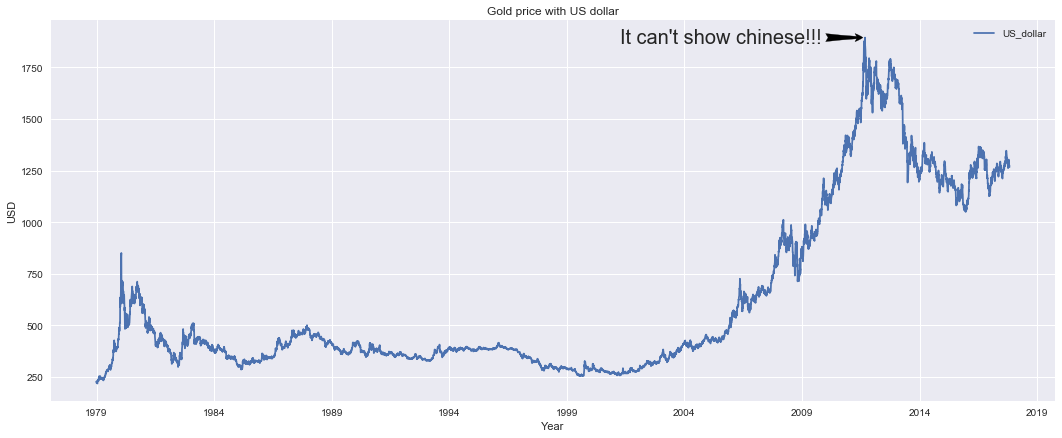

In [9]:
## https://matplotlib.org/users/annotations.html
plt.figure(figsize=(18,7))
plt.plot(df['Date'], df['US_dollar'], )
plt.title('Gold price with US dollar')   ## 圖片標題
plt.xlabel('Year')    ## X軸標題
plt.ylabel('USD')    ## Y軸標題
plt.legend()  ## 顯示標籤
#plt.xlim('1978-12-29','2018-01-01')  ## X軸範圍設定

##  va='bottom:上 , center:置中, top:下'   , ha='right:文字左端為座標點, center:文字置中, right:文字右端為座標點
##                  要註記的文字              xy=要標記的點                xytext=文字起始點
plt.annotate('It can\'t show chinese!!!', xy=('2011-09-05', '1895'), xytext=('2005-07-20', 1895),size=20,\
             va="center", ha="center",arrowprops=dict(facecolor='black', arrowstyle='fancy'))

## 時間 & 金價、30日、60日、120日、240日 折線圖

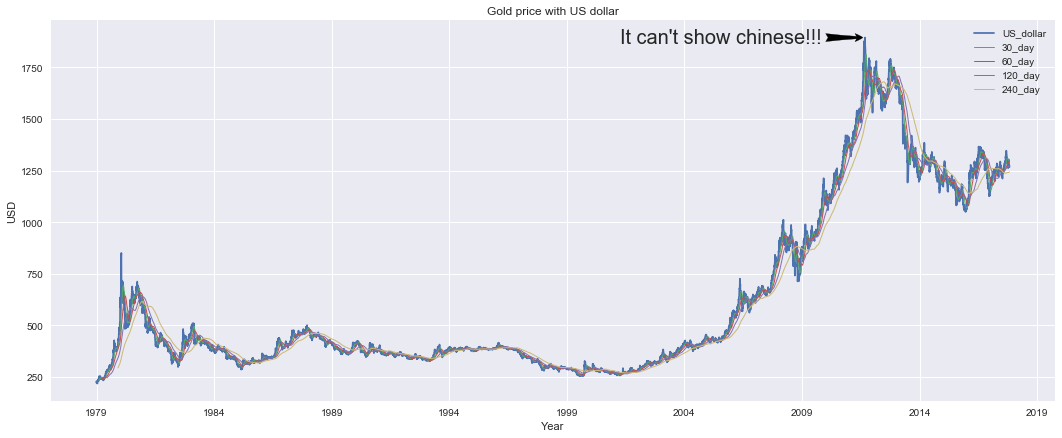

In [10]:
#plt.plot(df['Date'], df['US_dollar'])
plt.figure(figsize=(18,7))
plt.plot(df['Date'], df['US_dollar'])
plt.plot(df['Date'], df['30_day'], lw = 1)
plt.plot(df['Date'], df['60_day'], lw = 1)
plt.plot(df['Date'], df['120_day'], lw = 1)
plt.plot(df['Date'], df['240_day'], lw = 1)

plt.title('Gold price with US dollar')   ## 圖片標題
plt.xlabel('Year')    ## X軸標題
plt.ylabel('USD')    ## Y軸標題
plt.legend()  ## 顯示標籤

plt.annotate('It can\'t show chinese!!!', xy=('2011-09-05', '1895'), xytext=('2005-07-20', 1895),size=20,\
             va="center", ha="center",arrowprops=dict(facecolor='black', arrowstyle='fancy'))

## 金價 & 時間 折線圖(us_dollar, 30日、60日、120日、240日) - html 可縮放版

In [11]:
df_plot = df[['US_dollar', '30_day', '60_day', '120_day', '240_day']]
p = TimeSeries(df_plot, title="GOLD", ylabel='US dollar', xlabel = 'Year', width=1200, height=600)
output_file("gold_price_timeseries.html")
show(p)
df_plot.head()

C:\Users\wanget\Anaconda3\lib\site-packages\bokeh\core\json_encoder.py:73: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  if pd and isinstance(obj, pd.tslib.Timestamp):


,US_dollar,30_day,60_day,120_day,240_day
Date,,,,,
1978-12-29,226.0,NaN,NaN,NaN,NaN
1979-01-01,226.0,NaN,NaN,NaN,NaN
1979-01-02,226.8,NaN,NaN,NaN,NaN
1979-01-03,218.6,NaN,NaN,NaN,NaN
1979-01-04,223.2,NaN,NaN,NaN,NaN
